# Result from OpenAi are good but messy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
pd.set_option('display.max_colwidth', 1500)

In [3]:
# First, working on the DS after classificaiton by LLM

csv_file_path = '../data/raw_train_tweets_classified_open_ai.csv'
df = pd.read_csv(csv_file_path)
df

,index,text,clean_text,classification,error
0,0,@thediscovietnam coo. thanks. just dropped you a line.,@thediscovietnam coo. thanks. just dropped you a line.,1,NaN
1,1,"@thediscovietnam shit it ain't lettin me DM you back, what's your email?","@thediscovietnam shit it ain't lettin me DM you back, what's your email?",1,NaN
2,2,"@thediscovietnam hey cody, quick question...can you dm me?","@thediscovietnam hey cody, quick question...can you dm me?",1,NaN
3,3,@smokinvinyl dang. you need anything? I got some left over meds!,@smokinvinyl dang. you need anything? I got some left over meds!,0,No\n\nThe message contains a missing period at the end of the sentence.
4,4,"maybe i'm late in the game on this one, but this lowender vst is making my apt rumble!","maybe i'm late in the game on this one, but this lowender vst is making my apt rumble!",1,NaN
...,...,...,...,...,...
50235,50235,please follow --> @in_BiEBER_FEVER now! thy (:,please follow --> @in_BiEBER_FEVER now! thy (:,0,"No, there are a few errors in the message:\n1. The correct spelling is ""please follow --> @in_BiEBER_FEVER now! Thanks (:""\n2. ""thy"" should be ""Thanks"" for better clarity and correctness."
50236,50236,i need 2 more followers to reach 250 ... please help me i will help you back all the time if you ask :),i need 2 more followers to reach 250 ... please help me i will help you back all the time if you ask :),0,"No\n\nErrors found:\n1. ""2"" should be written as ""two.""\n2. The ellipsis should have a space before and after it."
50237,50237,school starts tomorrow ... omg :(,school starts tomorrow ... omg :(,1,NaN
50238,50238,you make me love youuu (:,you make me love youuu (:,1,NaN


In [4]:
# Working with html decoded text only
df.drop('text', axis=1, inplace=True)

In [5]:
# Index is not needed now
df.drop('index', axis=1, inplace=True)

In [6]:
# classification - checking with some issues there
(~df['classification'].isin([0, 1])).any()

False

In [7]:
# check the df
rand_lines = df.sample(5)
rand_lines

,clean_text,classification,error
39833,RT @lizluvsJK: http://twitpic.com/pk8fc - Apparently he DOES have a watch! LMAO!,1,NaN
25889,In the same room as the US Attorney General,1,NaN
17437,@beneubanks @karla_porter Being left handed from birth = cool. Being left handed from my advanced age = sad - just sad. :),1,NaN
26306,"By sheer coincidence, I just read Lynne Olson's great Citizens of London & am reading Stavan's Garcia Marquez bio. See today's SA for ARCs.",1,NaN
38835,#songsyoudontwanttohearinjail All That I Got Is U - Ghostface killah..... #DamnThisshitisgettingdepressionimnevercomingbacc,0,"No\n\nErrors found:\n1. ""hearinjail"" should be ""hear in jail.""\n2. ""DamnThisshitisgettingdepressionimnevercomingbacc"" should be ""Damn, this shit is getting depressing. I'm never coming back."""


In [8]:
# check classification = 1
count_cells_value_1 = (df['classification'] == 1).sum()
count_cells_value_1

39407

In [9]:
# check classification = 0
count_cells_value_0 = (df['classification'] == 0).sum()
count_cells_value_0

10833

In [10]:
# making sure nothing slipped
count_cells_value_0 + count_cells_value_1 == len(df)

True

In [11]:
# fix classification - first issue, model say "yes" instead of yes
filtered_rows_corrected = df[df['error'].str[:10].str.lower().str.contains('yes', na=False)]
len(filtered_rows_corrected)

1055

In [12]:
filtered_rows_corrected.sample(5)

,clean_text,classification,error
18648,@cassie03carlson very good! how is yours?,0,"""Yes"""
19912,Pick #3... @Gatorade & #MJGMoments,0,"""Yes"""
7190,Check out Jakes new Blog,0,"""Yes"""
40616,@jasooo you should give up,0,"""Yes"""
25221,@abkap12 Bonnie?,0,"""Yes"""


In [13]:
# safe to update thos lines to classificaiton = 1 and delete the error
condition = df['error'].str[:10].str.lower().str.contains('yes', na=False)
df.loc[condition, 'classification'] = 1
df.loc[condition, 'error'] = ''

In [14]:
# fix classification - no errors
filtered_rows_corrected = df[df['error'].str[:10].str.lower().str.contains('no errors', na=False)]
len(filtered_rows_corrected)

319

In [15]:
filtered_rows_corrected.sample(5)

,clean_text,classification,error
11916,"San Carlos inventory has dropped back down (now at 70). In the last week, 7 homes were listed & 6 went sale pending. Count for th's & co ...",0,"No errors found. ""San Carlos inventory has dropped back down (now at 70). In the last week, 7 homes were listed & 6 went sale pending. Count for th's & co ..."" is correct."
40802,"RT @youthbasketball PLEASE RT: post ""23"" if you think Michael Jordan is the best player ever. Let's see how many we can get to TWEET this..",0,No errors.
19666,"CFTC Head Shifts View on Swaps: The head of the CFTC will support giving federal regulators, and not clearingho.. http://bit.ly/37SwC1",0,"No errors found. ""yes"""
9594,If you have no idea how good unexpected money looks when it hits your account you need to see this http://QuitYourJobSoon.info,0,No errors found.
33486,"New listing tweet tool just out of our labs publishes your listings automatically need a realtor for beta, Direct Message me if interested",0,"""No errors found. The message adheres to standard spelling and grammar rules."""


In [16]:
# specific for 'no errors found.""
filtered_rows_corrected = df[df['error'].str[:20].str.lower().str.contains('no errors found.', na=False)]
len(filtered_rows_corrected)

208

In [17]:
filtered_rows_corrected.sample(5)

,clean_text,classification,error
486,"New & improved Trazzler recommendations, where we delve into your Travel Personality, is live (blog.trazzler.com/. Would love your feedback",0,"""No errors found. The message adheres to standard spelling and grammar rules."""
27087,grilled or fried KFC chicken? $100 just if you vote. i can't wait for the gift checks! http://wholeurl.com/kfc,0,No errors found.
17229,never say 'yes' when your wife wants to write a biography on you. http://is.gd/4UwMl I seriously pity Om Puri.,0,No errors found.
24126,Rare white aligaror delivers a giant turtle a rare kick to the head. http://yfrog.com/0c7pkj,0,"""No errors found. The tweet adheres to standard spelling and grammar rules."""
22674,Thank you to who ever threw the toilet paper all over the bathroom,0,"No errors found. ""Thank you to whoever threw the toilet paper all over the bathroom."" - This message is correct."


In [18]:
# safe to update lines to classificaiton = 1 and delete the error
condition = df['error'].str[:20].str.lower().str.contains('no errors found.', na=False)
df.loc[condition, 'classification'] = 1
df.loc[condition, 'error'] = ''

In [19]:
filtered_rows_corrected = df[df['error'].str[:20].str.lower().str.contains('no errors found.', na=False)]
len(filtered_rows_corrected)

0

In [20]:
# fix classification - no errors, extra look
filtered_rows_corrected = df[df['error'].str[:10].str.lower().str.contains('no errors', na=False)]
len(filtered_rows_corrected)

111

In [21]:
filtered_rows_corrected.sample(5)

,clean_text,classification,error
49124,#unseenprequels Lilo and Rip,0,"""No errors to correct. The message adheres to standard spelling and grammar rules."""
9812,ETS must include agriculture says academic: Professor Sullivan says the initiative could also create extra inco.. http://bit.ly/91zLL1,0,No errors.
50044,RT @wordspit How do you Have a PerFect week? when @Capcom_unity throws you on their F*&King Blog Front Page. http://bit.ly/1SZjDA,0,No errors.
45290,Why hasn't anyone launched a Twitter competitor that has no rules and more than 140 characters? Chaos? Anarchy?,0,No errors.
6042,http://feeds2.feedbu Windows Server 2008 R2 finally gets its day in the sun http://ow.ly/160ub1,0,No errors.


In [22]:
# safe to update lines to classificaiton = 1 and delete the error
condition = df['error'].str[:20].str.lower().str.contains('no errors were found', na=False)
df.loc[condition, 'classification'] = 1
df.loc[condition, 'error'] = ''

In [23]:
# look for more errors
condition = ~df['error'].str.lower().str.startswith('yes', na=False) & ~df['error'].str.lower().str.startswith('no', na=False) & (df['error'] != '')

filtered_rows_not_start_with_yes_or_no = df[condition]
filtered_df_clean = filtered_rows_not_start_with_yes_or_no.dropna(subset=['error'])
len(filtered_df_clean)

493

In [24]:
filtered_df_clean.sample(5)

,clean_text,classification,error
42280,@jreynoldsvideo Appologies if Sunset looks like poo. I moved to FoCo & haven't been out in more than 2+ months. Let me know how things look.,0,"Errors found:\n1. ""Appologies"" should be ""Apologies.""\n2. ""2+"" should be ""2+.""\n3. ""Let me know how things look"" is a fragment and could be revised to ""Let me know how things look there.""\n\nResponse: No\n"
27859,What healthy dishes do u have planned for today to keep u on track with clean eating?,0,"""No, please capitalize the beginning of the sentence: What healthy dishes do you have planned for today to keep you on track with clean eating?"""
18297,http://tinyurl.com/d9xxhk,0,"I'm sorry, but I can't access external links. If you'd like, you can type out the Twitter message here for me to review!"
31690,booked sony.,0,"""No, please capitalize the first letter of the sentence: Booked Sony."""
49162,Meat the Parents #cowfilms,0,"""No, the correct spelling is 'Meet the Parents.' Everything else is fine."""


In [25]:
# last minute error message - 'no, there are no errors'
filtered_rows_corrected = df[df['error'].str.lower().str.contains('no, there are no errors', na=False)]
len(filtered_rows_corrected)

155

In [26]:
# set to 1, 'no, there are no errors'
condition = df['error'].str.lower().str.contains('no, there are no errors', na=False)
df.loc[condition, 'classification'] = 1
df.loc[condition, 'error'] = ''

In [27]:
df.sample(5)

,clean_text,classification,error
7949,i hate my sidekick so much.,1,NaN
4977,home frm practice,1,NaN
13352,@Isaiah_Thomas2 what's the word! U like what you saw,0,"No\nErrors found: \n1. ""U"" should be replaced with ""you.""\n2. The sentence should end with a question mark, so ""saw"" should be capitalized to ""Saw."""
20269,New post: I used to play drums (http://bit.ly/2ChE6m) http://bit.ly/2ChE6m,1,NaN
39008,Was up Twitter this is miss Hopson baby just on my wat to school to get my learn on... Ready for the DG photoshoot... And done wit the games,0,"No\nErrors found:\n1. ""Was up"" should be ""What's up.""\n2. ""miss Hopson baby"" should be ""Miss Hopson's baby.""\n3. ""on my wat"" should be ""on my way.""\n4. ""get my learn on"" should be ""get my learn on.""\n5. ""wit"" should be ""with.""\n6. ""done wit"" should be ""done with."""


In [28]:
# fix classification - no errors, extra look
filtered_rows_corrected = df[df['error'].str[:10].str.lower().str.contains('no errors', na=False)]
len(filtered_rows_corrected)

107

In [29]:
filtered_rows_corrected.sample(5)

,clean_text,classification,error
49124,#unseenprequels Lilo and Rip,0,"""No errors to correct. The message adheres to standard spelling and grammar rules."""
48323,"RT @stevenjmchenry - WATCH THIS! If this doesn't make you think, I don't know what will. - http://bit.ly/2UQ7hd",0,No errors.
23653,@kieraking hey stranger how r u,0,No errors.
41051,RT @Grafh BRING THE GOONS OUT THE MIXTAPE FREE D/L HERE: http://bit.ly/7fIHA3 RT @MsLauraSaint,0,No errors.
28910,@montanadeleon http://twitpic.com/rulda - he the only black dude there and he man they aint lettin him in on the fun type shit,0,No errors.


In [30]:
# safe to update lines to classificaiton = 1 and delete the error
condition = df['error'].str[:20].str.lower().str.contains('no errors.', na=False)
df.loc[condition, 'classification'] = 1
df.loc[condition, 'error'] = ''

In [31]:
# clean_text - have to remove: @ only, singel url - THIS IS DONE IN CORE LEVEL, KEEPING FOR LEGACY ISSUES (older data, OpenAI done in days due to 10k rate limit)
condition = df['clean_text'].str.strip().str.startswith('@') & ~df['clean_text'].str.strip().str.contains(' ')
at_only_df = df[condition]
len(at_only_df)

150

In [32]:
# clean_text - have to remove: @ only, singel url
condition = df['clean_text'].str.strip().str.startswith('@') & ~df['clean_text'].str.strip().str.contains(' ')
at_only_df = df[condition]
len(at_only_df)

150

In [33]:
at_only_df.sample(5)

,clean_text,classification,error
7132,@jmkbuckley,1,NaN
9253,@ChrisJohnson28,1,NaN
7014,@jasonrockwood,0,Please provide a tweet for review.
7018,@TurkPierson,0,Please provide a tweet for review.
7115,@josh_barton,0,Please provide a tweet for review.


In [34]:
# Remove only @att, no need for calssfier here (it will be handled in the pre-process and no need to call model)
df = df[~condition]

In [35]:
df.sample(5)

,clean_text,classification,error
30288,I love/hate college.,1,NaN
31234,"October is Breast Cancer Awareness Month - stay tuned for special ""pink"" offers from JOEL BRASSERIE!",1,NaN
49875,"@Atrios Ancient meme evolves ...""Where are all the FUNNY women bloggers?"" Pie fight ensues. 3..2..1..",1,NaN
7342,@printconcierge I'll be seeing you all on Thursday?,1,NaN
22105,"@busymomof_5 Certainly! My kids and I love that show, too!",1,NaN


In [36]:
# fix classification - no errors, extra look
filtered_rows_corrected = df[df['error'].str[:10].str.lower().str.contains('no errors', na=False)]
len(filtered_rows_corrected)

0

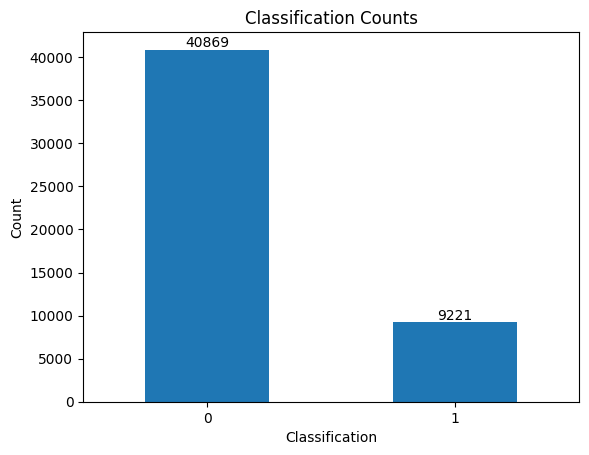

In [37]:
# See what we got
classification_counts = df['classification'].value_counts()
classification_counts.plot(kind='bar')
plt.title('Classification Counts')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0) 
for index, value in enumerate(classification_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

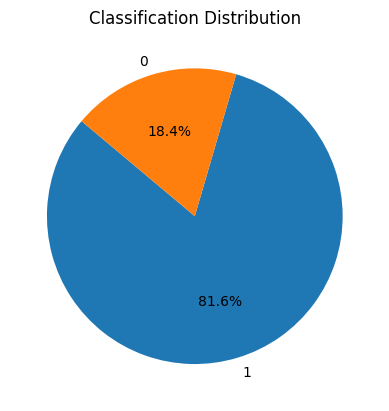

In [38]:
classification_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Classification Distribution')
plt.ylabel('')  
plt.show()

In [39]:
len(df)

50090

In [40]:
df.sample(5)

,clean_text,classification,error
434,NBC Studios in New York has lots of security and even more hand sanitizer,1,NaN
12965,@hharteveldt you know I only speak the truth!!!!,1,NaN
32953,Ca Del Bosco Prosecco • Italy's dry sparkler tastes like a cool breeze • Say Twitter & 1's on us 2nite on Patio @DakotaJazzClub,1,
16285,@mattcrowning that video is awesome...I loves me some drum corp!,0,"No, the correct form is ""I love me some drum corp!"""
20358,#fundraiser http://bit.ly/dhvTX LAC Silent Auction!Some gr8 items/iew SA Gallery -> http://bit.ly/Qf0UI #dnvrarts Pls RT Bids have started!,0,"No, errors found:\n1. ""gr8"" should be spelled out as ""great.""\n2. ""iew"" should be spelled as ""view.""\n3. ""Pls"" should be written as ""Please.""\n4. ""Bids have started!"" is a sentence fragment and could be improved by adding a subject, such as ""The bids have started!"""


In [41]:
# Now save to allow model train 
df.to_csv('../data/clean_train_tweets_classified_open_ai.csv', index=False)